<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> <h1>Tarea Semanal 7</h1></center>
<h3> Teoría de circuitos 2 </h3>
<h3> 2do Cuatrimestre 2023 </h3>    
<h3> Facundo N. Iglesias </h3>    
</div>

<div class="alert alert-success text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>INDICE</h1></center>
    
</div>

0. [LIBRERIAS](#id0)

1. [EJERCICIO 1](#id1)
    - [1.1 Interconexión 1](#id1.2)
    - [1.2 Interconexión 2](#id1.3)
    - [1.3 Parámetros Z  ](#id1.4)
    - [1.4 Simulación en LtSpice  ](#id1.5)

2. [EJERCICIO 2](#id2)
   - [2.1 Parámetros T interconexión en cascada](#id2.1)
   - [2.2 Matriz Admitancia Indefinida (MAI)](#id2.2)
   - [2.3 Simulación de la transferencia de tensión en LtSpice](#id2.3)
   - [2.4 Matriz MAI y propiedades con SimPy](#id2.4)
   - [2.5 Computación de transferencia de tensión con MAI utilizando SimPy](#id2.5)
   - [2.6 Computación de impedancia de excitación con MAI utilizando SimPy](#id2.6)
   
3. [ANEXO](#id3)
    - [3.1 Cálculos Ejercicio 1](#id3.1)
    - [3.2 Cálculos Ejercicio 2](#id3.2)
    - [3.3 Código de funciones para calcular matrices de cofactores de orden N](#id3.3)



<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="id0">
        <h1> LIBRERIAS</h1>
    </a> 
</center>
</div>

In [214]:
from IPython.display import IFrame, display, Math
from numpy import sqrt
import numpy as np
import matplotlib.pyplot as plt
from pytc2.general import Chebyshev_polynomials 
from pytc2.sistemas_lineales import analyze_sys,  tf2sos_analog
import scipy.signal as sig
import sympy as sp
from sympy.abc import s
from sympy.parsing.sympy_parser import parse_expr
from sympy.solvers import solve
from sympy import Matrix

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="id1">
        <h1>EJERCICIO 1</h1>
    </a>    
</center>
</div>

<img src="./rsc/ejercicio1.png" align="center" width="518" height="539" /> 


<a name="id1.2">
   <h2>Interconexión 1</h2>
</a>
En principio se plantea a simple vista la siguiente interconexión en la cual se identifica que el cuadripolo 2 es de tipo PI y se encuentra conectado en paralelo al cuadripolo 1 correspondiente a un transformador ideal:

<img src="./rsc/sim/Ej1-Interconexion1.png" align="center" width="600" height="300" /> 

Por lo tanto, lo más conveniente resulta:
- Calcular los parámetros Y del circuito PI.
- Calcular los parámetros T del transformador y convertirlos a Y.
- Sumar matricialmente los parámetros Y.
- Finalmente convertir a parámetros Z.

Los parámetros se obtuvieron por definición en el anexo de cálculos, llegando a la siguiente matriz de parámetros Y para el circuito PI:

$
\left(
\begin{array}{ll}
\frac{3}{2} & \frac{-1}{2} \\
\frac{-1}{2} & \frac{5}{6}
\end{array}
\right)
$


Para el caso del transformador con bornes homólogos opuestos la matriz T obtenida es:

$
\left(
\begin{array}{ll}
-a & 0 \\
0 & \frac{-1}{a}
\end{array}
\right)
$=
$
\left(
\begin{array}{ll}
-1 & 0 \\
0 & -1
\end{array}
\right)
$

a: Relación de transformación.


El problema ocurre al intentar obtener los parámetros Y:

\begin{equation}
Y_{11}=\frac{I_1}{V_1}|_{V_2=0}=\frac{\frac{-1}{a}(-I_2)}{-aV_2} = \infty
\end{equation}

Donde se observa que estos no están definidos.

<a name="id1.3">
   <h2>Interconexión 2</h2>
</a>
Como la matriz equivalente del transformador no está definida para parámetros Y, se plantea una nueva interconexión: 

<img src="./rsc/sim/Ej1-Interconexion2.png" align="center" width="600" height="300" /> 

Por lo tanto, lo más conveniente resulta:
- Calcular los parámetros T de los cuadripolos 1,2 y 4.
- Transformar los parámetros T en Y.
- Calcular los parametros Y del cuadripolo 3 y sumarlos con el resultante del paso anterior.
- Transformar a parámetros Z.

Los parámetros se obtuvieron por definición en el anexo de cálculos, llegando a las siguientes matrices:

TR1=
$
\left(
\begin{array}{ll}
1 & 0 \\
1 & 1
\end{array}
\right)
$

TR3=
$
\left(
\begin{array}{ll}
1 & 0 \\
\frac{1}{3} & 1
\end{array}
\right)
$

TTrafo=
$
\left(
\begin{array}{ll}
-1 & 0 \\
0 & -1
\end{array}
\right)
$

Nota: Se observa que el determinante es igual a 1 para todas las matrices, algo caracteristico de las matrices de parámetros T cuando la red que representan es pasiva. 

Como los cuadripolos están conectados en cascada la matriz resultante resulta de la multiplicación de las 3 anteriores:

Ttotal=
$
\left(
\begin{array}{ll}
1 & 0 \\
1 & 1
\end{array}
\right)
$
.
$
\left(
\begin{array}{ll}
-1 & 0 \\
0 & -1
\end{array}
\right)
$
.
$
\left(
\begin{array}{ll}
1 & 0 \\
\frac{1}{3} & 1
\end{array}
\right)
$
=
$
\left(
\begin{array}{ll}
-1 & 0 \\
\frac{-4}{3} & -1
\end{array}
\right)
$



Se observa que en la matriz T resultante el parámetro "B" es nulo y al ser el denominador común de la matriz que resulta de convertir los parámetros en Y, esta termina siendo nuevamente indefinida. La justificación analítica se encuentra en el anexo de cálculos.

<a name="id1.4">
   <h2>Parámetros Z</h2>
</a>
Se propone analizar el circuito de forma completa obteniendo los parámetros Z por definición y de forma directa:

<img src="./rsc/sim/Ej1-ParametrosZ.png" align="center" width="600" height="300" /> 

Del cual se desprenden las siguientes ecuaciones:

\begin{equation}
V1_{trafo} = -V2_{trafo}
\end{equation}

\begin{equation}
I1_{trafo} = I2_{trafo}
\end{equation}

\begin{equation}
I1 = I_{R2} + I1_{trafo} + I_{R1}
\end{equation}

\begin{equation}
I1 = \frac{V1-V2}{2} + I1_{trafo}+V1
\end{equation}

\begin{equation}
I2 = -I_{R2} + I2_{trafo} + I_{R3}
\end{equation}

\begin{equation}
I2 = -\frac{V1-V2}{2} + I2_{trafo} + \frac{V2}{3}
\end{equation}



A partir de las ecuaciones obtenidas del circuito, se utiliza el modulo de calculo Sympy para resolver el sistema y proceder a calcular los parámetros Z por definición:

In [60]:
V1, V2, I1, I2, V1t, V2t, I1t, I2t = sp.symbols("V1, V2, I1, I2, V1t, V2t, I1t, I2t")
R1, R2, R3 = sp.symbols("R1, R2, R3")

sistema = sp.solve([
                I1-I1t-V1-((V1-V2)/2),
                I2-I2t-(V2/3)+(V1-V2)/2
            ], 
            [I1t,I2t])

ecuacion = sistema[I1t] - sistema[I2t]
ecuacion

I1 - I2 - 2*V1 + 4*V2/3

#### Parámetro Z11
Impedancia de entrada del circuito en vacío:
\begin{equation}
Z_{11} = \frac{V1}{I1}|_{I2=0}
\end{equation}

In [67]:
sistema = sp.solve([
                V1+V2,
                ecuacion,
                ],
                [V1,I1])
sistema[V1]/sistema[I1].subs(I2,0)

3/10

#### Parámetro Z12
Transimpedancia o impedancia de transferencia de entrada a salida:
\begin{equation}
Z_{12} = \frac{V1}{I2}|_{I1=0}
\end{equation}

In [71]:
sistema = sp.solve([
                V1+V2,
                ecuacion,
                ],
                [V1,I2])
sistema[V1]/sistema[I2].subs(I1,0)

-3/10

#### Parámetro Z21
Transimpedancia o impedancia de transferencia de salida a entrada:
\begin{equation}
Z_{21} = \frac{V2}{I1}|_{I2=0}
\end{equation}

In [74]:
sistema = sp.solve([
                V1+V2,
                ecuacion,
                ],
                [V2,I1])
sistema[V2]/sistema[I1].subs(I2,0)

-3/10

#### Parámetro Z22
Impedancia de salida:
\begin{equation}
Z_{22} = \frac{V2}{I2}|_{I1=0}
\end{equation}

In [75]:
sistema = sp.solve([
                V1+V2,
                ecuacion,
                ],
                [V2,I2])
sistema[V2]/sistema[I2].subs(I1,0)

3/10

Finalmente, la Matriz de parámetros Z resultante es:

$
\left(
\begin{array}{ll}
\frac{3}{10} & \frac{-3}{10} \\
\frac{-3}{10} & \frac{3}{10}
\end{array}
\right)
$
=

Donde podemos observar que la red es recíproca y también simétrica. 
\begin{equation}
Reciprocidad: Z_{12} = Z_{21}
\end{equation}

Condición que se cumplirá siempre que la red sea pasiva.

\begin{equation}
Simetría: Z_{11} = Z_{22}
\end{equation}

Condición que se cumplirá siempre y cuando la relación de transformación sea unitaria.


<a name="id1.5">
   <h2>Simulación en LtSPice</h2>
</a>
Luego de realizar una análisis de "network parameters" en LtSpice se obtuvo la siguiente simulación:

<img src="./rsc/sim/Ej1-network.png" align="center" width="1288" height="604" /> 

En la imagen se puede observar la respuesta de modulo y fase correspondiente a cada uno de los parámetros de red del circuito.
Los cursores están puestos sobre Z11 y Z12, indicando una fase de 0° y 180° respectivamente en regimen permanente. El modulo se observa que es de 0,3 Ohm para todos los parámetros y se verifica que los resultados se condicen con la matriz obtenida analiticamente.

<div class="alert alert-success text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> 
    <a name="id2">
       <h1>Ejercicio 2</h1>
    </a>    
</center>
    
</div>

<img src="./rsc/ejercicio2.png" align="center" width="1229" height="400" /> 

<a name="id2.1">
   <h2>Parámetros T interconexión en cascada</h2>
</a>

A simple vista se identifica que el circuito tiene la forma de una red escalera por lo tanto, se puede descomponer en dos etapas interconectadas en cascada. Se propone seguir los siguientes pasos:
- Obtener los parametros T de una red genérica compuesta por una impedancia en serie y una admitancia en derivación.
- Obtener los parámetros T de ambas redes y
- Como las redes están en cascada, multiplicar matricialmente para obtener la matriz final que representa el comportamiento eléctrico del circuito completo.

#### Cuadripolo genérico ZY
En primer lugar se procede a obtener la matriz de parámetros T del siguiente cuadripolo:
<img src="./rsc/circuitoZY.png" align="center" width="540" height="480" /> 

El calculo de los parámetros por definición se encuentra en el anexo de calculos, donde se arribó al siguiente resultado:

$
\left(
\begin{array}{ll}
ZY+1 & Z \\
Y & 1
\end{array}
\right)
$
=


Reemplazando por valores de los componentes del circuito se obtienen las siguientes matrices:

T1 = 
$
\left(
\begin{array}{ll}
2s²+1 & \frac{3}{2}s \\
\frac{4}{3} & 1
\end{array}
\right)
$
y
T2=
$
\left(
\begin{array}{ll}
\frac{s}{2}+1 & \frac{s}{2}  \\
1 & 1
\end{array}
\right)
$

Luego la matriz del circuito resulta de multiplicar matricialmente T1 y T2:

Tt = 
$
\left(
\begin{array}{ll}
2s²+1 & \frac{3}{2}s \\
\frac{4}{3} & 1
\end{array}
\right)
$
*
$
\left(
\begin{array}{ll}
\frac{s}{2}+1 & \frac{s}{2}  \\
1 & 1
\end{array}
\right)
$
=
$
\left(
\begin{array}{ll}
s³+2s²+2s+1 & s³+2s  \\
\frac{2}{3}s²+\frac{4}{3}s+1 & \frac{2}{3}s²+1
\end{array}
\right)
$


Donde se puede observar que la transferencia de tensión es la inversa del parámetro A:

\begin{equation}
A = \frac{V_1}{V_2}|_{-I_2=0}  \rightarrow \boxed{\frac{V_o}{V_i} = \frac{1}{s³+2s²+2s+1}}
\end{equation}

También se puede expresar como:
\begin{equation}
\boxed{T(s) = \frac{1}{(s²+s+1)(s+1)}}
\end{equation}

En la expresión de la transferencia se puede observar que cumple con lo indicado en la consigna, el polo real tanto como los polos complejos conjugados se encuentran ubicados en una circunferencia de radio unitario. Además es una transferencia normalizada en frecuencia cuyo denominador corresponde a un polinomio de Butterworth de orden 3:

<img src="./rsc/tablaButter.png" align="center" width="635" height="651" /> 

Por lo tanto, el circuito se comporta como un filtro pasa-bajos que presenta máxima planicidad en la banda de paso.

Para verificar lo deducido anteriormente a partir de la función transferencia, se procede a realizar una simulación simbólica:

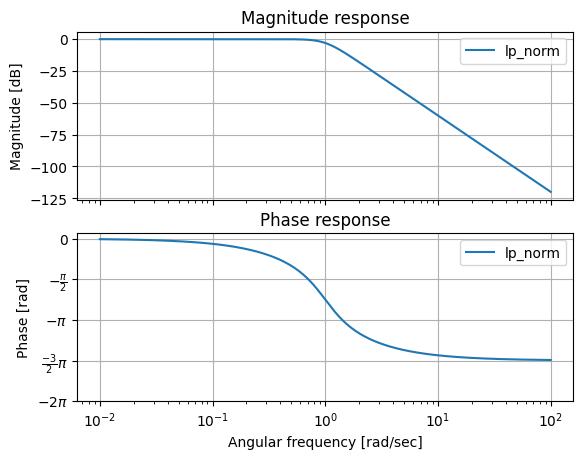

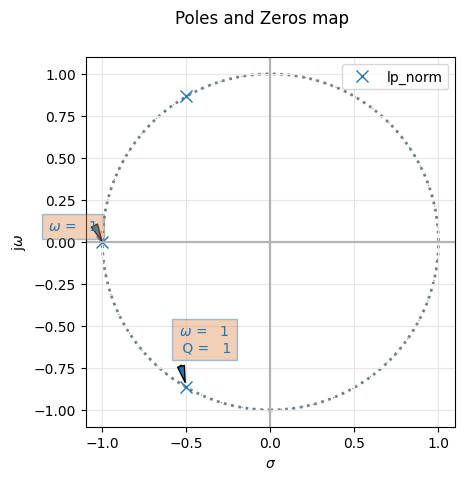

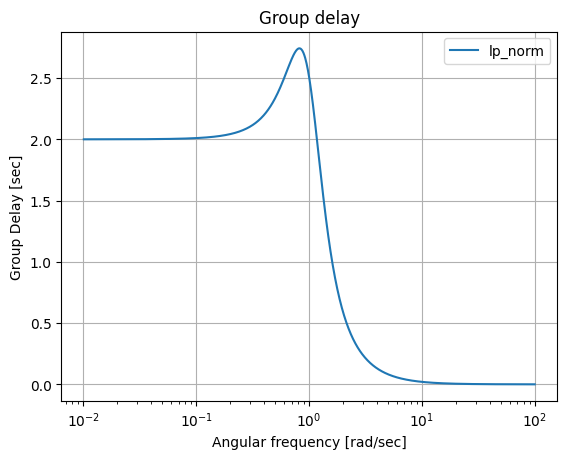

In [6]:
num = [1]
den = [1, 2, 2, 1]
analyze_sys([sig.TransferFunction(num, den)], ['lp_norm'])

En la respuesta en frecuencia de modulo y fase podemos ver que se verifica lo deducido a partir de la expresión obtenida.

<a name="id2.2">
   <h2>Matriz Admitancia Indefinida (MAI)</h2>
</a>

La matriz admitancia indefinida se calculó aplicando la primera ley de Kirchhoff en cada uno de los nodos del circuito, el desarrollo se encuentra en el anexo de calculos en el cual se llegó al siguiente resultado:


$
Y=
\left(
\begin{array}{ll}
Y_1 & -Y_1 & 0 & 0  \\
-Y_1 & Y_1+Y_2+Y_3 & -Y_2 & -Y_4 \\
0 & -Y_2 & Y_2+Y_3 & -Y_3 \\
0 & -Y_4 & -Y_3 & Y_3+Y_4
\end{array}
\right)
$
\begin{equation}
Y_1 = \frac{1}{sL_1} \space\space\space Y_2= \frac{1}{L_2} \space\space\space Y_3=\frac{1}{R}\space\space\space Y_4=sC 
\end{equation}

La transferencia de tensión es:

\begin{equation}
V^{ij}_{mn} = \frac{V_{ij}}{V_{mn}} = sig(i-j)*sig(m-n)  \frac{Y^{ij}_{mn}}{Y^{mn}_{mn}}
\end{equation}

El termino:
\begin{equation}
Y^{ij}_{mn} 
\end{equation}
Es el determinante de la matriz resultante de suprimir las filas "i" y "j" y las columnas "m" y "n", para el caso:

\begin{equation}
\frac{V_{23}}{V_{03}} = sig(-1)*sig(-3)  \frac{Y^{23}_{03}}{Y^{03}_{03}}
\end{equation}

$
\begin{equation}
Y^{23}_{03} = det  
\end{equation}
\left(
\begin{array}{ll}
-Y_1 & Y_1+Y_2+Y_4 \\
0 & -Y_2
\end{array}
\right)
= Y_1*Y2
$

$
\begin{equation}
Y^{03}_{03} = det  
\end{equation}
\left(
\begin{array}{ll}
Y_1 + Y_2+Y_4 & -Y_2 \\
-Y_2 & Y_2+Y_3
\end{array}
\right)
= (Y_1+Y_2+Y_4)*(Y_2+Y_3)-Y_2²
$


El algebra aplicada para llegar al siguiente resultado se encuentra en el anexo de calculos:
\begin{equation}
\boxed{\frac{V_o}{V_i} = \frac{1}{s³+2s²+2s+1}}
\end{equation}

Donde se puede observar que se llegó al mismo resultado que planteando la interconexión y los parámetros T.

<a name="id2.3">
   <h2>Simulación de la transferencia de tensión en LtSpice</h2>
</a>

<img src="./rsc/sim/Ej2-simulacion.png" align="center" width="1283" height="580" /> 

En la captura de la simulación se observa tal como se indicó en la simulación simbólica:
- La caída de 3 dB del modulo para la frecuencia normalizada de 1rad/s.
- Máxima planicidad en la banda de paso correspondiente con una transferencia de Butterworth.
- Rotación de 0° a 270° debido a que cada uno de los 3 polos aportan 90° cuando la frecuencia tiende a infinito.

<a name="id2.4">
   <h2>Matriz MAI y propiedades con SimPy</h2>
</a>
Se procederá a determinar la impedancia de entrada del circuito y la transferencia de tensión empleando las herramientas de cálculo matricial que brinda la librería SimPy de Python. Para ello, construimos la MAI reemplazando por los valores de los componentes:

$
Y_{MAI}=
\left(
\begin{array}{ll}
\frac{2}{3s}  & -\frac{2}{3s}    &   0   &  0 \\
-\frac{2}{3s} & \frac{2}{3s} + \frac{2}{s} + \frac{4}{3}s   & -\frac{2}{s} & -\frac{4}{3}s     \\  
0             & -\frac{2}{s} & \frac{2}{s} + 1 & -1 \\
0             & -\frac{4}{3}s & -1 & 1+\frac{4}{3}s
\end{array}
\right)
$

Cargamos la matriz en un array de SimPy:

In [189]:
Y = Matrix([
    [2/(3*s), -2/(3*s), 0, 0], 
    [-2/(3*s), 2/(3*s) + 2/s+4*s/3, -2/s,-4*s/3], 
    [0, -2/s, 2/s+1, -1],
    [0, -4*s/3, -1, 1+4*s/3]
])
Y

Matrix([
[ 2/(3*s),        -2/(3*s),       0,         0],
[-2/(3*s), 4*s/3 + 8/(3*s),    -2/s,    -4*s/3],
[       0,            -2/s, 1 + 2/s,        -1],
[       0,          -4*s/3,      -1, 4*s/3 + 1]])

Aprovechando la simplicidad de las funciones se puede verificar que cumple con las propiedades de una MAI y de paso constatar que está bien calculada.

In [215]:
print('* El determinante de la matriz es igual a: {} '.format(Y.det()))
for i in range(4):
    print('* La sumatoria de la fila {} es: {} '.format(i,sum(Y.row(i))))
for j in range(4):
    print('* La sumatoria de la columna {} es: {} '.format(j,sum(Y.col(j))))
print('\n* Todos los cofactores de primer orden son iguales: ')
Y.cofactorMatrix()

* El determinante de la matriz es igual a: 0 
* La sumatoria de la fila 0 es: 0 
* La sumatoria de la fila 1 es: 0 
* La sumatoria de la fila 2 es: 0 
* La sumatoria de la fila 3 es: 0 
* La sumatoria de la columna 0 es: 0 
* La sumatoria de la columna 1 es: 0 
* La sumatoria de la columna 2 es: 0 
* La sumatoria de la columna 3 es: 0 

* Todos los cofactores de primer orden son iguales: 


Matrix([
[8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2)],
[8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2)],
[8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2)],
[8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2), 8/9 + 16/(9*s) + 4/(3*s**2)]])

<a name="id2.5">
   <h2>Computación de transferencia de tensión con MAI utilizando SimPy</h2>
</a> 

La expresión que determina la transferencia de tensión, como se vió anteriormente, es la siguiente:

\begin{equation}
\frac{V_{23}}{V_{03}} = sig(-1)*sig(-3)  \frac{Y^{23}_{03}}{Y^{03}_{03}}
\end{equation}


Para calcular los cofactores de segundo orden empleamos una función cuyo código está disponible en el anexo de funciones auxiliares.

In [163]:
Ynum = obtenenerNcofactor(Y, (2,3), (0,3))
Ynum

Matrix([
[       -2/(3*s),    0],
[4*s/3 + 8/(3*s), -2/s]])

In [164]:
Yden = obtenenerNcofactor(Y, (0,3), (0,3))
Yden

Matrix([
[4*s/3 + 8/(3*s),    -2/s],
[           -2/s, 1 + 2/s]])

In [165]:
T = np.sign(2-3)*np.sign(0-3)*Ynum.det()/Yden.det()

In [166]:
sp.expand(T)

4/(4*s**3 + 8*s**2 + 8*s + 4)

Dividiendo numerador y denominador por 4, se verifica que la transferencia es la misma a la que se llegó en los puntos anteriores

<a name="id2.6">
   <h2>Computación de impedancia de excitación con MAI utilizando SimPy</h2>
</a> 

En este caso la expresión de la impedancia de entrada es igual a:

\begin{equation}
Z^{ij}_{mn} = \frac{V_{ij}}{I_{mn}} = sig(i-j)*sig(m-n)  \frac{Y^{ij}_{mn}}{Y^{n}_{n}}
\end{equation}

Para el caso:

\begin{equation}
Z^{03}_{mn} = \frac{V_{03}}{I_{01}} = sig(0-3)*sig(0-1)  \frac{Y^{03}_{01}}{Y^{1}_{1}}
\end{equation}




In [211]:
Ynum = obtenenerNcofactor(Y,(0,3),(0,1))
Ynum

Matrix([
[   -2/s, -4*s/3],
[1 + 2/s,     -1]])

In [212]:
Yden = obtenenerNcofactor(Y,(1,),(1,))
Yden

Matrix([
[2/(3*s),       0,         0],
[      0, 1 + 2/s,        -1],
[      0,      -1, 4*s/3 + 1]])

In [213]:
Z = np.sign(0-3)*np.sign(0-1)*Ynum.det()/Yden.det()
Z = sp.simplify(Z)
Z

3*s/2

Según se puede apreciar, la impedancia de excitación del circuito equivale a la de un inductor de 1,5H. A continuación se realizan ambas simulaciones en LtSpice para comparar los resultados y verificar que es el resultado al que se arribó es el correcto:

<img src="./rsc/sim/Ej2-Zexc.png" align="center" width="1283" height="580" /> 

Donde se puede observar que las graficas de respuesta en frecuencia son idénticas y que para un punto aleatoreo el modulo, fase y retardo de grupo son iguales.

<div class="alert alert-success text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> 
    <a name="id3">
        <h1>ANEXO</h1>
    </a>     
</center>
    
</div>




<a name="id3.1">
   <h2>Cálculos Ejercio 1</h2>
</a> 

In [108]:
IFrame("./rsc/ts7-ej1.pdf", width=1000, height=1000)

<a name="id3.2">
   <h2>Cálculos Ejercio 2</h2>
</a> 

In [109]:
IFrame("./rsc/ts7-ej2.pdf", width=1000, height=1000)

<a name="id3.3">
   <h2>Código de funciones para calcular matrices de cofactores de orden N</h2>
</a> 

In [121]:
#row y col: tuplas (i,j) y (m,n)
#mat: Matriz a calcular el 2do cofactor
def obtenener2cofactor(mat, row, col):
    return mat.minor_submatrix(row[0],col[0]).minor_submatrix(row[1]-1,col[1]-1)    

In [146]:
def obtenenerNcofactor(mat, row, col):
    for index in range(0,len(row)):
        mat = mat.minor_submatrix(row[index]-index,col[index]-index)
    return mat

---